# Stacking with Standalone and Ensemble Algorithms

<b> Import the relevant libraries </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

<b> Read the data </b>

In [2]:
data = pd.read_csv('boston_house_prices.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<b> Preprocess the dataset to remove null values and one-hot encoded categorical variables to prepare the data for modeling </b>

In [3]:
# check how many columns have less than 10 % null data
perc_missing = data.isnull().mean() * 100
cols = perc_missing[perc_missing < 10].index.tolist()
cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

In [4]:
data_final = data.fillna(-1)

<b> Divide the dataset into train and validation DataFrames </b>

In [5]:
train, val = train_test_split(data_final, test_size=0.2, random_state=11)

x_train = train.drop(columns=['PRICE'])
y_train = train['PRICE'].values

x_val = val.drop(columns=['PRICE'])
y_val = val['PRICE'].values

<b> Initialize dictionaries in which to store the train and validation MAE values </b>

In [6]:
train_mae, val_mae = {}, {}

<b> Train a DecisionTreeRegressor model (dt) with the following hyperparameters and save the scores: </b>
    
dt_params = { <br>
    'criterion': 'mae',<br>
    'min_samples_leaf': 15,<br>
    'random_state': 11<br>
}

In [7]:
dt_params = {
    'criterion': 'mae',
    'min_samples_leaf': 15,
    'random_state': 11
}

In [8]:
# creating the model
dt = DecisionTreeRegressor(**dt_params)
dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', min_samples_leaf=15, random_state=11)

In [9]:
# making predictions
dt_preds_train = dt.predict(x_train)
dt_preds_val = dt.predict(x_val)

In [10]:
# calculating mean absolute error
train_mae['dt'] = mean_absolute_error(y_train, dt_preds_train)
val_mae['dt'] = mean_absolute_error(y_val, dt_preds_val)

<b> Train a KNeighborsRegressor model (knn) with the following hyperparameters and save the scores: </b>
    
knn_params = {'n_neighbors': 5}

In [11]:
# create the model
knn_params = {'n_neighbors': 5}
knn = KNeighborsRegressor(**knn_params)
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [12]:
# making predictions
knn_preds_train = knn.predict(x_train)
knn_preds_val = knn.predict(x_val)

In [13]:
# calculating mean absolute error
train_mae['knn'] = mean_absolute_error(y_train, knn_preds_train)
val_mae['knn'] = mean_absolute_error(y_val, knn_preds_val)

<b> Train a RandomForestRegressor model (rf) with the following hyperparameters and save the scores </b>

rf_params = { <br>
    'n_estimators': 20,<br>
    'criterion': 'mae',<br>
    'max_features': 'sqrt',<br>
    'min_samples_leaf': 10,<br>
    'random_state': 11,<br>
    'n_jobs': -1<br>
}

In [14]:
# defining hyperparameters
rf_params = {
    'n_estimators': 20,
    'criterion': 'mae',
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'random_state': 11,
    'n_jobs': -1
}

In [15]:
# create the model
rf = RandomForestRegressor(**rf_params)
rf.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_features='sqrt', min_samples_leaf=10,
                      n_estimators=20, n_jobs=-1, random_state=11)

In [16]:
# making predictions
rf_preds_train = rf.predict(x_train)
rf_preds_val = rf.predict(x_val)

In [17]:
# calculate mean absolute error
train_mae['rf'] = mean_absolute_error(y_train, rf_preds_train)
val_mae['rf'] = mean_absolute_error(y_val, rf_preds_val)

<b> Train a GradientBoostingRegressor model (gbr) with the following hyperparameters and save the scores </b>

gbr_params = { <br>
    'n_estimators': 20,<br>
    'criterion': 'mae',<br>
    'max_features': 'sqrt',<br>
    'min_samples_leaf': 10,<br>
    'random_state': 11<br>
}

In [18]:
# defining hyperparameters
gbr_params = {
    'n_estimators': 20,
    'criterion': 'mae',
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'random_state': 11
}

In [19]:
# create the model
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(x_train, y_train)

C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)


GradientBoostingRegressor(criterion='mae', max_features='sqrt',
                          min_samples_leaf=10, n_estimators=20,
                          random_state=11)

In [20]:
# making predictions
gbr_preds_train = gbr.predict(x_train)
gbr_preds_val = gbr.predict(x_val)

In [21]:
# calculate mean absolute error
train_mae['gbr'] = mean_absolute_error(y_train, gbr_preds_train)
val_mae['gbr'] = mean_absolute_error(y_val, gbr_preds_val)

<b> Prepare the training and validation datasets, with the four meta estimators having the same hyperparameters that were used in the previous steps </b>

In [22]:
# preparing the training set
num_base_predictors = len(train_mae)

x_train_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+num_base_predictors))
x_train_metapreds[:, :-num_base_predictors] = x_train
x_train_metapreds[:, -num_base_predictors:] = -1

kf = KFold(n_splits=5)

for train_indices, val_indices in kf.split(x_train):
    kfold_x_train, kfold_x_val = x_train.iloc[train_indices], x_train.iloc[val_indices]
    kfold_y_train, kfold_y_val = y_train[train_indices], y_train[val_indices]
    
    predictions = []
    
    dt = DecisionTreeRegressor(**dt_params)
    dt.fit(kfold_x_train, kfold_y_train)
    predictions.append(dt.predict(kfold_x_val))
    
    knn = KNeighborsRegressor(**knn_params)
    knn.fit(kfold_x_train, kfold_y_train)
    predictions.append(knn.predict(kfold_x_val))
    
    rf = RandomForestRegressor(**rf_params)
    rf.fit(kfold_x_train, kfold_y_train)
    predictions.append(rf.predict(kfold_x_val))
    
    gbr = GradientBoostingRegressor(**gbr_params)
    gbr.fit(kfold_x_train, kfold_y_train)
    predictions.append(gbr.predict(kfold_x_val))
    
    for i, preds in enumerate(predictions):
        x_train_metapreds[val_indices, -(i+1)] = preds

C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
C:\Users\H

In [23]:
# preparing the validation set
x_val_metapreds = np.zeros((x_val.shape[0], x_val.shape[1]+num_base_predictors))
x_val_metapreds[:, :-num_base_predictors] = x_val
x_val_metapreds[:, -num_base_predictors:] = -1
predictions = []
    
dt = DecisionTreeRegressor(**dt_params)
dt.fit(x_train, y_train)
predictions.append(dt.predict(x_val))

knn = KNeighborsRegressor(**knn_params)
knn.fit(x_train, y_train)
predictions.append(knn.predict(x_val))

rf = RandomForestRegressor(**rf_params)
rf.fit(x_train, y_train)
predictions.append(rf.predict(x_val))

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(x_train, y_train)
predictions.append(gbr.predict(x_val))
for i, preds in enumerate(predictions):
    x_val_metapreds[:, -(i+1)] = preds

C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)


<b> Train a LinearRegression model (lr) as the stacked model </b>

In [24]:
# create the model
lr = LinearRegression(normalize=True)
lr.fit(x_train_metapreds, y_train)

LinearRegression(normalize=True)

In [25]:
# make predictions
lr_preds_train = lr.predict(x_train_metapreds)
lr_preds_val = lr.predict(x_val_metapreds)

In [26]:
# calculate mean absolute error
train_mae['lr'] = mean_absolute_error(y_true=y_train, y_pred=lr_preds_train)
val_mae['lr'] = mean_absolute_error(y_true=y_val, y_pred=lr_preds_val)

<b> Visualize the train and validation errors for each individual model and the stacked model </b>

In [27]:
mae_scores = pd.concat([pd.Series(train_mae, name='train'), 
                        pd.Series(val_mae, name='val')], 
                       axis=1)
mae_scores

,train,val
dt,2.384406,3.282353
knn,3.455545,3.978039
rf,2.316120,3.029828
gbr,2.452970,3.054477
lr,2.248086,2.852430


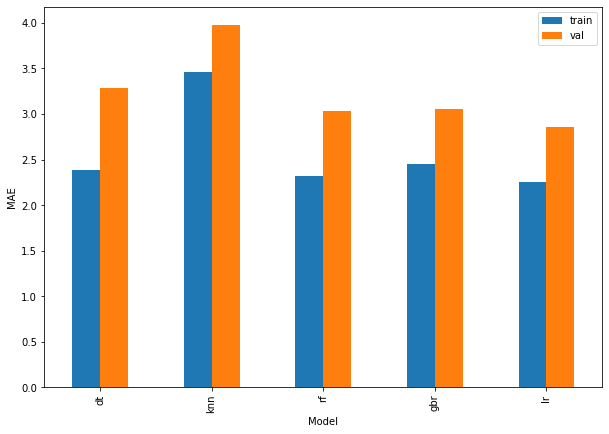

In [28]:
mae_scores.plot(kind='bar', figsize=(10,7))
plt.ylabel('MAE')
plt.xlabel('Model')
plt.show()